In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Data_Lansat8.csv to Data_Lansat8.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
import math
%matplotlib inline

In [ ]:
df=pd.read_csv("Data_Lansat8.csv")
df.drop(['Latitude',
       'Longitude'],axis=1,inplace=True)
df.head()

,B1,B2,B3,B4,B5,B6,B7,B10,B11,Salinity,TDS,Turbidity
0,0.0936,0.1081,0.1319,0.1272,0.0615,0.0169,0.0098,0.2920,0.2914,0.00,9,149.64
1,0.0971,0.1092,0.1325,0.1302,0.0683,0.0168,0.0104,0.2920,0.2913,0.00,6,151.11
2,0.0924,0.1037,0.1246,0.1232,0.0809,0.0163,0.0094,0.2918,0.2914,0.00,3,151.38
3,0.0938,0.1070,0.1306,0.1278,0.0695,0.0173,0.0099,0.2921,0.2915,0.00,8,151.51
4,0.0788,0.0921,0.1196,0.1232,0.1000,0.0443,0.0330,0.2941,0.2932,0.25,340,93.24


In [ ]:
df.describe()

,B1,B2,B3,B4,B5,B6,B7,B10,B11,Salinity,TDS,Turbidity
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,0.075775,0.089362,0.114487,0.109296,0.070064,0.025152,0.017316,0.293389,0.292654,7.475782,7765.115646,110.082653
std,0.011800,0.011192,0.013082,0.023244,0.024373,0.015998,0.012223,0.000749,0.000667,10.303350,10544.019002,29.990492
min,0.048100,0.060400,0.083100,0.054200,0.019600,0.008100,0.005300,0.291800,0.291300,0.000000,0.000000,0.000000
25%,0.066775,0.081650,0.105125,0.094325,0.050725,0.014025,0.008625,0.292700,0.292025,0.200000,265.750000,99.037500
50%,0.078800,0.092100,0.119600,0.122300,0.073700,0.017650,0.010800,0.293700,0.292900,0.280000,371.000000,108.035000
75%,0.080300,0.093400,0.120500,0.123200,0.092375,0.034700,0.026100,0.294100,0.293200,20.557500,21332.000000,134.900000
max,0.099700,0.114900,0.139700,0.131900,0.128300,0.090200,0.067300,0.296100,0.295200,25.470000,25904.000000,151.920000


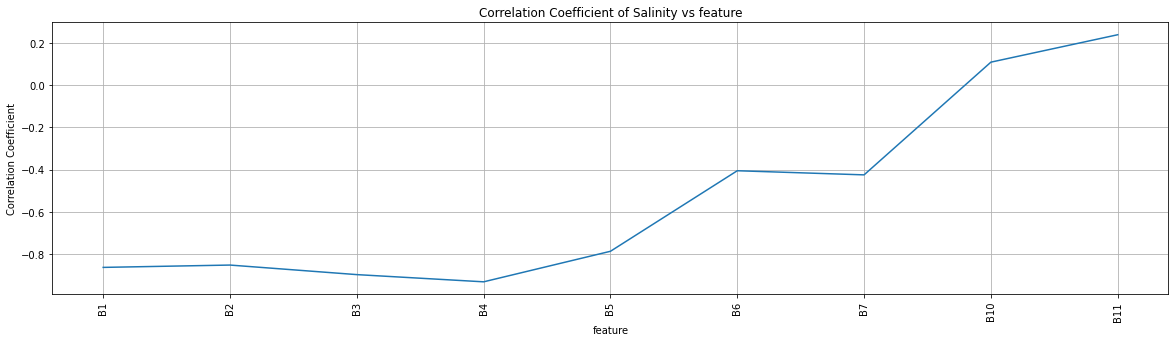

In [ ]:
A = df.corr()
y_col = 'Salinity'
f = plt.figure(figsize=(20,5))
t = A[y_col].drop(['Salinity','TDS','Turbidity'])
k = list(t.index)
x = t.plot(rot=90,grid=True)
x = plt.xticks(range(0,len(k)), k)
plt.title('Correlation Coefficient of '+y_col+' vs feature')
plt.xlabel('feature')
plt.ylabel('Correlation Coefficient')
plt.show()

In [ ]:
#df=df.drop(columns=['Unnamed: 19','Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23'])
df=df.dropna()
df.keys()

Index(['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B10', 'B11', 'Salinity',
       'TDS', 'Turbidity'],
      dtype='object')

In [ ]:
df.isnull().sum()

B1           0
B2           0
B3           0
B4           0
B5           0
B6           0
B7           0
B10          0
B11          0
Salinity     0
TDS          0
Turbidity    0
dtype: int64

In [ ]:
df.keys()
df1 =df

In [ ]:
df1 = df.groupby('Salinity').mean()
df1['Salinity'] = df1.index

In [ ]:
A=df1.corr()
A=A[abs(A[ 'Salinity'])>=0.6]
A

,B1,B2,B3,B4,B5,B6,B7,B10,B11,Salinity,TDS,Turbidity
B1,1.000000,0.996045,0.975535,0.910393,0.577329,0.184573,0.181265,-0.428279,-0.527342,-0.864063,-0.862040,-0.377082
B2,0.996045,1.000000,0.981603,0.910541,0.555639,0.164274,0.161316,-0.443510,-0.543962,-0.853010,-0.850557,-0.368119
B3,0.975535,0.981603,1.000000,0.967109,0.641478,0.236244,0.239936,-0.347135,-0.463840,-0.898324,-0.895135,-0.405843
B4,0.910393,0.910541,0.967109,1.000000,0.771112,0.359949,0.370012,-0.180925,-0.311120,-0.932491,-0.928926,-0.441832
B5,0.577329,0.555639,0.641478,0.771112,1.000000,0.793970,0.800281,0.333021,0.230447,-0.787645,-0.788403,-0.352016
Salinity,-0.864063,-0.853010,-0.898324,-0.932491,-0.787645,-0.405628,-0.425187,0.109410,0.239474,1.000000,0.999772,0.422292
TDS,-0.862040,-0.850557,-0.895135,-0.928926,-0.788403,-0.408886,-0.428445,0.106489,0.235759,0.999772,1.000000,0.418153


In [ ]:
A

,B1,B2,B3,B4,B5,B6,B7,B10,B11,Salinity,TDS,Turbidity
B1,1.000000,0.996045,0.975535,0.910393,0.577329,0.184573,0.181265,-0.428279,-0.527342,-0.864063,-0.862040,-0.377082
B2,0.996045,1.000000,0.981603,0.910541,0.555639,0.164274,0.161316,-0.443510,-0.543962,-0.853010,-0.850557,-0.368119
B3,0.975535,0.981603,1.000000,0.967109,0.641478,0.236244,0.239936,-0.347135,-0.463840,-0.898324,-0.895135,-0.405843
B4,0.910393,0.910541,0.967109,1.000000,0.771112,0.359949,0.370012,-0.180925,-0.311120,-0.932491,-0.928926,-0.441832
B5,0.577329,0.555639,0.641478,0.771112,1.000000,0.793970,0.800281,0.333021,0.230447,-0.787645,-0.788403,-0.352016
Salinity,-0.864063,-0.853010,-0.898324,-0.932491,-0.787645,-0.405628,-0.425187,0.109410,0.239474,1.000000,0.999772,0.422292
TDS,-0.862040,-0.850557,-0.895135,-0.928926,-0.788403,-0.408886,-0.428445,0.106489,0.235759,0.999772,1.000000,0.418153


In [ ]:
A.keys()

Index(['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B10', 'B11', 'Salinity',
       'TDS', 'Turbidity'],
      dtype='object')

In [ ]:
X=df1[[ 'B1','B2', 'B3', 'B4', 'B5']]
y=df1[['Salinity']]

In [ ]:
# scaler=StandardScaler()
scaler = MinMaxScaler()
scaler.fit(X)
scaler1 = MinMaxScaler()
# scaler1=StandardScaler()
scaler1.fit(y)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
scaled_data_X=scaler.transform(X)
scaled_data_y=scaler1.transform(y)

In [ ]:
scaled_data_y

array([[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [9.81546918e-03],
       [9.81546918e-03],
       [9.81546918e-03],
       [3.92618767e-02],
       [5.88928151e-02],
       [6.77267373e-01],
       [8.34314880e-01],
       [9.22654103e-01],
       [8.93207695e-01],
       [9.32469572e-01],
       [1.52336082e-01],
       [3.34511190e-01],
       [7.08284256e-01],
       [9.43855516e-01],
       [3.53356890e-03],
       [3.53356890e-03],
       [3.53356890e-03],
       [3.53356890e-03],
       [3.53356890e-03],
       [3.53356890e-03],
       [3.53356890e-03],
       [7.06713781e-03],
       [7.06713781e-03],
       [7.06713781e-03],
       [7.06713781e-03],
       [7.06713781e-03],
       [7.06713781e-03],
       [7.06713781e-03],
       [7.06713781e-03],
       [6.63525717e-02],
       [9.53670985e-01],
       [4.62112289e-01],
       [8.84962701e-01],
       [9.24224578e-01],
       [9.34040047e-01],
       [9.55241461e-01],


In [ ]:
scaled_data_X=pd.DataFrame(scaled_data_X)
scaled_data_X.columns=[ 'B1','B2', 'B3', 'B4', 'B5']

In [ ]:
scaled_data_X

,B1,B2,B3,B4,B5
0,0.881783,0.875229,0.862191,0.939511,0.385465
1,0.949612,0.895413,0.872792,0.978121,0.448022
2,0.858527,0.794495,0.733216,0.888031,0.563937
3,0.885659,0.855046,0.839223,0.947233,0.459062
4,0.594961,0.581651,0.644876,0.888031,0.739650
...,...,...,...,...,...
289,0.637597,0.592661,0.616608,0.857143,0.855566
290,0.647287,0.620183,0.653710,0.880309,0.572217
291,0.639535,0.634862,0.703180,0.893179,0.395584
292,0.201550,0.207339,0.134276,0.115830,0.221711


In [ ]:
def build_nn_model(lr):
    model=keras.Sequential([layers.Dense(32,activation='relu',input_shape=(1,)),
                            layers.Dense(16,activation='relu'),
                            layers.Dense(1,activation='sigmoid')])
    optimizer=tf.keras.optimizers.Adam(lr)
    model.compile(loss='mae',
                  optimizer=optimizer,
                  metrics=['mae','mse'])
    return model

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.10, random_state=33)

In [ ]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
# reg=linear_model.Ridge(alpha=0.1)
# reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# reg.coef_ = reg.coef_.reshape(1,-1)
reg.coef_

array([[-1007.97803415,  1136.67876083,  -406.11910056,  -154.47038265,
          -86.22381868]])

In [ ]:
reg.intercept_

array([51.73211507])

In [ ]:
coeff = tuple(reg.coef_)+tuple(reg.intercept_)

In [ ]:
print("{}*B1+{}*B2+{}*B3+{}*B4+{}*B5+{}".format(reg.coef_[0,0],reg.coef_[0,1],reg.coef_[0,2],reg.coef_[0,3],reg.coef_[0,4],reg.intercept_[0]))

-1007.9780341451489*B1+1136.6787608261338*B2+-406.11910056202225*B3+-154.4703826501434*B4+-86.223818680173*B5+51.732115069019365


In [ ]:
print(reg.score(X_test,Y_test),reg.score(X_train,Y_train))

0.921185350826001 0.8920064676817142


In [ ]:
scaler1.inverse_transform([[1.0]])

array([[25.47]])

In [ ]:
1/scaler1.scale_

array([25.47])

In [ ]:
A = MinMaxScaler()
A.fit([[-0.0180,]])

(array([13.9975]), array([10.45973686]))

In [ ]:
df.describe()


Text(0.5, 1.0, '(i)Residual values in testset')

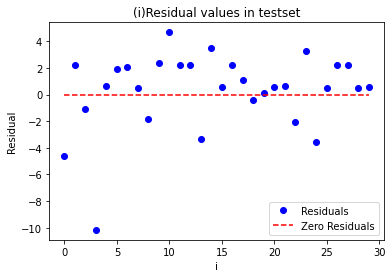

In [ ]:
X_t = X_test.to_numpy()
Y_t = Y_test.to_numpy()

pred = reg.predict(X_t).reshape(-1,1)
plt.plot(pred-Y_t,'bo')
plt.plot(Y_t-Y_t,'r',ls='--')
plt.xlabel('i')
plt.ylabel('Residual')
plt.legend(['Residuals','Zero Residuals'])
plt.title('(i)Residual values in testset')

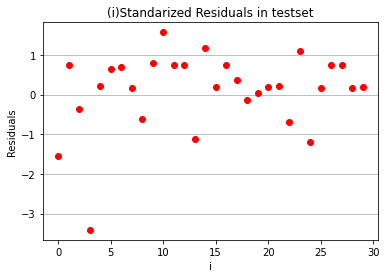

In [ ]:
X_t = X_test.to_numpy()
Y_t = Y_test.to_numpy()
pred = reg.predict(X_t).reshape(-1,1)
MSres = np.sum((pred-Y_t)**2)/(pred.shape[0]-2)
plt.plot((pred.flatten()-Y_t.flatten())/math.sqrt(MSres),'ro')
plt.title('(i)Standarized Residuals in testset')
plt.xlabel('i')
plt.ylabel('Residuals')
plt.grid(axis='y')

In [ ]:
Y_test

,Salinity
198,8.09
276,0.28
287,0.28
291,13.73
193,0.13
134,23.48
62,23.91
224,0.24
11,23.50
238,1.05
